In [ ]:
import numpy as np

In [ ]:
# np.random.uniform(1)


d=100
op_dem=120



retail_rev=1
retail_cost=0.8

mp=0.2
ml=0.8

# Till 120 we will have mp but above that we will have loss

p=0

p_demand=0

net_profit=[]

for i in range(100,200):
  p_demand=0.01
  if i <= 120:
    temp_profit=(i*mp)#I suppose to make profit of i*mp
    temp_loss=(120-i)*ml#loss on the copies not sold as I expected 120 but i only sold
    temp=temp_profit-temp_loss
    # print(temp)
    temp_prob=p_demand*temp #contribution of this profit to the expected profit , I bielive only probabilistic addition is required

  else:

    temp_p=120*0.2 #always going to remain the same because true demand is greater than expected demand
    temp_l=0#true demand > expected demand
    temp=temp_p-temp_l

    temp=temp_profit+temp_loss
    temp_prob=p_demand*temp
  net_profit.append(temp)


  p+=temp_prob


p


21.899999999999974

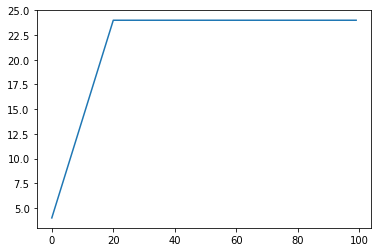

In [ ]:
import matplotlib.pyplot as plt
plt.plot(net_profit)

In [ ]:
-3000*0.1 +1250*0.15 +1250*0.3 +1250*0.2 +1250*0.15 +1250*0.1

825.0

In [ ]:
# np.random.uniform(1)


d=100
op_dem=120



retail_rev=1
retail_cost=0.8

mp=0.65-0.45
ml=0.45

# Till 120 we will have mp but above that we will have loss

p=0

p_demand=0

op_q=131

net_profit=[]

for i in range(100,201):
  p_demand=1/(200-100+1)
  if i <= op_q:
    temp_profit=(i*mp)#I suppose to make profit of i*mp
    temp_loss=(op_q-i)*ml#loss on the copies not sold as I expected 120 but i only sold
    temp=temp_profit-temp_loss
    # print(temp)
    temp_prob=p_demand*temp #contribution of this profit to the expected profit , I bielive only probabilistic addition is required

  else:

    temp_p=op_q*mp #always going to remain the same because true demand is greater than expected demand
    temp_l=0#true demand > expected demand### mera paisa lgga hei nahi hai maine sirf 120 paper banaye 
    temp=temp_p-temp_l

    temp_prob=p_demand*temp


  net_profit.append(temp)


  p+=temp_prob


p


23.007920792079222

## Revenue Sharing


In [ ]:
mp_vendor

0.2

In [ ]:
# np.random.uniform(1)


mp_vendor=1*(65/100) - 0.45# revshare- whole_saleprice
ml_vendor=0.45# iss amount ka koi buy back nahi hai


mp_publisher=0.45-0.45+ 1*(35/100)#wholesale_price- printing_cost + revenue_share of end_point_price
ml_publisher=0# no buy back and will only produce amount needed by the end point

# Till 120 we will have mp but above that we will have loss

p=0

p_demand=0

op_q=131# always determined through ml, mp of vendor last end point

#ml,mp of vendor and publisher can be very different 



def estimate_daily_profit(ml,mp,op_q):
  p=0
  for i in range(100,201):
    p_demand=1/(200-100+1)
    if i <= op_q:
      temp_profit=(i*mp)#I suppose to make profit of i*mp
      temp_loss=(op_q-i)*ml#loss on the copies not sold as I expected 120 but i only sold
      temp=temp_profit-temp_loss
      # print(temp)
      temp_prob=p_demand*temp #contribution of this profit to the expected profit , I bielive only probabilistic addition is required

    else:

      temp_p=op_q*mp #always going to remain the same because true demand is greater than expected demand
      temp_l=0#true demand > expected demand### mera paisa lgga hei nahi hai maine sirf 120 paper banaye 
      temp=temp_p-temp_l

      temp_prob=p_demand*temp




    p+=temp_prob
  return p


print(estimate_daily_profit(ml_vendor,mp_vendor,131),estimate_daily_profit(ml_publisher,mp_publisher,131))

23.007920792079222 44.13118811881194


## BUY BACK 1

In [ ]:
mp_vendor=1-0.8#rev-wholesale price
ml_vendor=0.8-0.6# no purchase (or wholesaleprice) - buy back, this is the loss incurred


mp_publisher=0.8-0.45# wholesale_price-printing_cost
ml_publisher=0.60+0.45-0.8#loss of buy_back +loss of printing_cost - initial_wholesale_price_earned


print(estimate_daily_profit(ml_vendor,mp_vendor,150),estimate_daily_profit(ml_publisher,mp_publisher,150))

24.950495049504912 44.92574257425744


In [ ]:
def estimate_daily_profit(ml,mp,op_q,lt_demand,zero_shift=0):
  '''
  zero_shift= demand is ) then what is ur earning
  '''
  lt_net_profits=[]
  for i in lt_demand:
    if i <= op_q:
      # temp_profit=(i*mp)#I suppose to make profit of i*mp
      if i==0:
        temp_profit=zero_shift
        temp_loss=0

      else:
        temp_profit=(i*mp)
        temp_loss=(op_q-i)*ml#loss on the copies not sold as I expected 120 but i only sold

      
      
      temp=temp_profit-temp_loss
      print(temp)

    else:

      temp_p=op_q*mp #always going to remain the same because true demand is greater than expected demand
      temp_l=0#true demand > expected demand### mera paisa lgga hei nahi hai maine sirf 120 paper banaye 
      temp=temp_p-temp_l




    lt_net_profits.append(temp)
  return np.array(lt_net_profits)

In [ ]:
# lt_profit=estimate_daily_profit(3000,1250,1,list(range(6)))
# lt_profit=estimate_daily_profit(2600,1225,1,list(range(6)))
# lt_profit=estimate_daily_profit(2600,1250,1,list(range(6)))


# lt_profit=estimate_daily_profit(0,2600+425-2250,1,list(range(6)),zero_shift=350)
lt_profit=estimate_daily_profit(3000-2250-400,3000-2250,1,list(range(6)),zero_shift=350)

350
750


In [ ]:
lt_prob=np.array([0.1,0.15,0.3,0.2,0.15,0.1])
sum(lt_profit*lt_prob)

710.0

In [ ]:
lt_profit

array([  0, 750, 750, 750, 750, 750])

In [ ]:
mp=0.2
ml=0.8


ul=200
ll=100


steps=ul-ll+1

step_size=(ul-ll+1)/steps

#Assuming uniform distribution
p_dist=[1/steps]*steps

# plt.plot(p_dist)
print(p_dist)

q=mp/(mp+ml)#empirically determined


optimal_num=ll
temp_prob=0

# for i,step in enumerate(range(ll,ul+1)):
#   temp_prob += p_dist[i] # creating cdf adding prob at each step
#   print(temp_prob,step)

#   # optimal_num=step

#   if temp_prob>q:
#     optimal_num=step
#     break


i=0
while temp_prob<q:

  temp_prob+=p_dist[i]
  optimal_num=i
  i+=1

# p_dist=[1/(ul-ll+1)]*

[0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.009900990099009901, 0.0099009

In [ ]:
optimal_num

20

In [ ]:
q

0.4375

In [ ]:
mp

0.35000000000000003

In [ ]:
ml

0.45

In [ ]:
1250/(1250+2600)

0.3246753246753247